In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline


ls ../data/

df = sqlContext.read.format("com.databricks.spark.csv").load('../data/train.csv')

df.show(2)


```bash
set header to databricks csv header to true.

```

df = sqlContext.read.format("com.databricks.spark.csv").options(header=True,inferschema=True).load('../data/train.csv')

df.printSchema()

df = df.coalesce(5)
df.write.parquet("../data/train1")

In [3]:
df = sqlContext.read.parquet("../data/train1/*.parquet")

In [4]:
df = df.cache()
df.count()

37670293

In [5]:
df.count()

37670293

In [6]:
pandasdf = df.select("hotel_continent").groupBy("hotel_continent").count().toPandas()
df.select("hotel_continent").groupBy("hotel_continent").count().show()

+---------------+--------+
|hotel_continent|   count|
+---------------+--------+
|              0|  712270|
|              1|     214|
|              2|19777647|
|              3| 4895159|
|              4| 4339118|
|              5|  373841|
|              6| 7572044|
+---------------+--------+



In [7]:
pandasdf

,hotel_continent,count
0,0,712270
1,1,214
2,2,19777647
3,3,4895159
4,4,4339118
5,5,373841
6,6,7572044


```bash
is_booking 
Values : 1,0
1- Booked 
0- Searched

```

In [8]:
df.select("hotel_continent","is_booking").show(20)

+---------------+----------+
|hotel_continent|is_booking|
+---------------+----------+
|              2|         0|
|              2|         1|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
|              2|         0|
+---------------+----------+
only showing top 20 rows



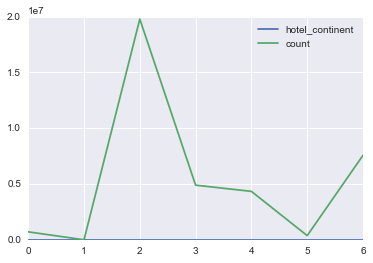

In [11]:
pandasdf.plot()

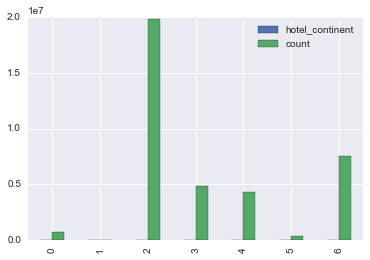

In [15]:
pandasdf.plot(kind='bar')

In [17]:
temppandas = df.select("hotel_continent","is_booking").groupBy("hotel_continent","is_booking").count().toPandas()
df.select("hotel_continent","is_booking").groupBy("hotel_continent","is_booking").count().show()

+---------------+----------+--------+
|hotel_continent|is_booking|   count|
+---------------+----------+--------+
|              4|         0| 4137269|
|              4|         1|  201849|
|              5|         0|  346240|
|              5|         1|   27601|
|              0|         0|  658454|
|              0|         1|   53816|
|              6|         0| 6987327|
|              6|         1|  584717|
|              1|         0|     203|
|              1|         1|      11|
|              2|         0|17964364|
|              2|         1| 1813283|
|              3|         0| 4575743|
|              3|         1|  319416|
+---------------+----------+--------+



In [29]:
temppandas1

,hotel_continent,is_booking,count
0,4,0,4137269
2,5,0,346240
4,0,0,658454
6,6,0,6987327
8,1,0,203
10,2,0,17964364
12,3,0,4575743


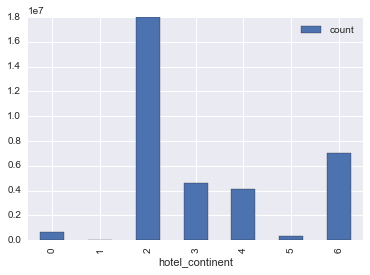

In [37]:
temppandas1 = temppandas[temppandas.is_booking==0]
temppandas1[['hotel_continent','count']].sort_values(by='hotel_continent').plot(x='hotel_continent',xlim=[0,6],kind='bar')

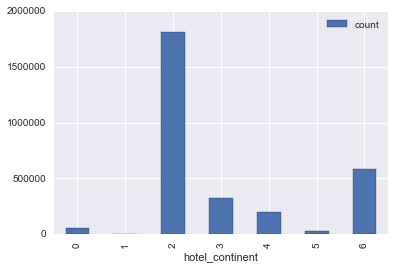

In [38]:
temppandas1 = temppandas[temppandas.is_booking==1]
temppandas1[['hotel_continent','count']].sort_values(by='hotel_continent').plot(x='hotel_continent',xlim=[0,6],kind='bar')

In [35]:
temppandas1.sort(columns='hotel_continent')

/Users/vishnu/miniconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,hotel_continent,is_booking,count
4,0,0,658454
8,1,0,203
10,2,0,17964364
12,3,0,4575743
0,4,0,4137269
2,5,0,346240
6,6,0,6987327


In [10]:
df.select("hotel_cluster").distinct().count()

100

In [20]:
pandasdf

,hotel_continent,count
0,0,712270
1,1,214
2,2,19777647
3,3,4895159
4,4,4339118
5,5,373841
6,6,7572044
